# Text Representation with Word Embeddings

### Exploring Word Embeddings with New Deep Learning Models

We will explore more sophisticated models which can capture semantic information and give us features which are vector representation of words, popularly known as embeddings.

Here we will explore the following feature engineering techniques:

- Word2Vec

Predictive methods like Neural Network based language models try to predict words from its neighboring words looking at word sequences in the corpus and in the process it learns distributed representations giving us dense word embeddings. We will be focusing on these predictive methods in this article.

## Prepare a Sample Corpus

Let’s now take a sample corpus of documents on which we will run most of our analyses in this article. A corpus is typically a collection of text documents usually belonging to one or more subjects or domains.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualize embeddings
from sklearn.decomposition import PCA

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The birds love to eat and sleep and chirp',
          'The cats love to eat and sleep',
          'The sky is very blue and the sky is very beautiful today',
          'The dog loves to sleep and eat'
]


corpus_df = pd.DataFrame({'Document': corpus})
corpus_df

,Document
0,The sky is blue and beautiful.
1,Love this blue and beautiful sky!
2,The birds love to eat and sleep and chirp
3,The cats love to eat and sleep
4,The sky is very blue and the sky is very beautiful today
5,The dog loves to sleep and eat


Let's go ahead and pre-process our text data now

## Simple Text Pre-processing

Since the focus of this unit is on feature engineering, we will build a simple text pre-processor which focuses on removing special characters, extra whitespaces, digits, stopwords and lower casing the text corpus.

In [2]:
import nltk
import re

# get list of common english stopwords
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
# download tokenizer - breaks down sentences into words
nltk.download('punkt')

# clean the text (not necessary too much in the case of deep learning models)
def normalize_document(doc): # The sky is blue and beautiful......
    # lower case and remove special characters\ extra whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['sky blue beautiful', 'love blue beautiful sky',
       'birds love eat sleep chirp', 'cats love eat sleep',
       'sky blue sky beautiful today', 'dog loves sleep eat'],
      dtype='<U28')

In [3]:
import nltk

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

In [4]:
tokenized_corpus

[['sky', 'blue', 'beautiful'],
 ['love', 'blue', 'beautiful', 'sky'],
 ['birds', 'love', 'eat', 'sleep', 'chirp'],
 ['cats', 'love', 'eat', 'sleep'],
 ['sky', 'blue', 'sky', 'beautiful', 'today'],
 ['dog', 'loves', 'sleep', 'eat']]

## The Word2Vec Model

This model was created by Google in 2013 and is a predictive deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. Essentially these are unsupervised models which can take in massive textual corpora, create a vocabulary of possible words and generate dense word embeddings for each word in the vector space representing that vocabulary.

Usually you can specify the size of the word embedding vectors and the total number of vectors are essentially the size of the vocabulary. This makes the dimensionality of this dense vector space much lower than the high-dimensional sparse vector space built using traditional Bag of Words models.

There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,

- The Continuous Bag of Words (CBOW) Model
- The Skip-gram Model

## The Continuous Bag of Words (CBOW) Model

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

Considering a simple sentence, ___“the quick brown fox jumps over the lazy dog”___, this can be pairs of __(context_window, target_word)__ where if we consider a context window of size 2, we have examples like __([quick, fox], brown)__, __([the, brown], quick)__, __([the, dog], lazy)__ and so on.

Thus the model tries to predict the __`target_word`__ based on the __`context_window`__ words.

![](https://i.imgur.com/ATyNx6u.png)


## The Skip-gram Model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word).

Considering our simple sentence from earlier, ___“the quick brown fox jumps over the lazy dog”___. If we used the CBOW model, we get pairs of __(context_window, target_word)__ where if we consider a context window of size 2, we have examples like __([quick, fox], brown)__, __([the, brown], quick)__, __([the, dog], lazy)__ and so on.

Now considering that the skip-gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets, and tries to predict each context word from its target word. Hence the task becomes to predict the context __[quick, fox]__ given target word __‘brown’__ or __[the, brown]__ given target word __‘quick’__ and so on.

Thus the model tries to predict the context_window words based on the target_word.

![](https://i.imgur.com/95f3eVF.png)

Further details can be found in [Text Analytics with Python](https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition/Ch04%20-%20Feature%20Engineering%20for%20Text%20Representation)

## Robust Word2Vec Model with Gensim

The __`gensim`__ framework, created by Radim Řehůřek consists of a robust, efficient and scalable implementation of the Word2Vec model. We will leverage the same on our sample toy corpus. In our workflow, we will tokenize our normalized corpus and then focus on the following four parameters in the Word2Vec model to build it.

- __`size`:__ The word embedding dimensionality
- __`window`:__ The context window size
- __`min_count`:__ The minimum word count
- __`sample`:__ The downsample setting for frequent words
- __`sg`:__ Training model, 1 for skip-gram otherwise CBOW

We will build a simple Word2Vec model on the corpus and visualize the embeddings.

In [5]:
import gensim
gensim.__version__
#4.0.0+

'4.3.3'

In [6]:
tokenized_corpus

[['sky', 'blue', 'beautiful'],
 ['love', 'blue', 'beautiful', 'sky'],
 ['birds', 'love', 'eat', 'sleep', 'chirp'],
 ['cats', 'love', 'eat', 'sleep'],
 ['sky', 'blue', 'sky', 'beautiful', 'today'],
 ['dog', 'loves', 'sleep', 'eat']]

In [7]:
from gensim.models import word2vec


# Set values for various parameters
feature_size = 20    # Word vector dimensionality  every word -> [......] -> vector size of 20 float numbers
window_context = 5  # Context window size (looking at surrounding words)
min_word_count = 1   # Minimum word count
sg = 1               # skip-gram model if sg = 1 and CBOW if sg = 0

w2v_model = word2vec.Word2Vec(tokenized_corpus,
                              vector_size=feature_size,
                              window=window_context,
                              min_count = min_word_count,
                              sg=sg, epochs=5000)
w2v_model

In [8]:
# embedding for the word sky
w2v_model.wv['sky']

array([-0.5729603 ,  0.39481637,  0.24301627,  0.47278437, -0.2360732 ,
       -0.343259  ,  0.5858813 ,  0.8051598 , -0.43501168,  0.19471067,
        0.23335059, -0.38316745, -0.1280008 ,  0.45462367,  0.28617364,
       -0.02496031,  0.34260848, -0.0952384 , -0.57644325, -0.47866657],
      dtype=float32)

In [9]:
# embedding for the word cats
w2v_model.wv['cats']

array([-0.31177023,  0.17520344, -0.16413285, -0.5043009 ,  0.3418004 ,
        0.03894394, -0.06967659,  0.43480217, -0.30209842,  0.37191796,
       -0.01608181, -0.12416217,  0.12001207, -0.42023623,  0.2228649 ,
       -0.08945738,  0.6648276 , -0.04548762, -0.3423654 ,  0.15214309],
      dtype=float32)

In [10]:
# embedding for the word dog
w2v_model.wv['dog']

array([-0.21396875,  0.11712985, -0.3260361 , -0.5312367 ,  0.33037147,
        0.13406532, -0.00489734,  0.6123193 , -0.32787845,  0.47922716,
        0.05724346, -0.24106193,  0.1075454 , -0.37096035,  0.2733763 ,
       -0.02602411,  0.8748078 ,  0.00318956, -0.33019033,  0.2110794 ],
      dtype=float32)

In [11]:
w2v_model.wv['sky'].shape

(20,)

In [12]:
w2v_model.wv.index_to_key

['sky',
 'sleep',
 'eat',
 'love',
 'beautiful',
 'blue',
 'loves',
 'dog',
 'today',
 'cats',
 'chirp',
 'birds']

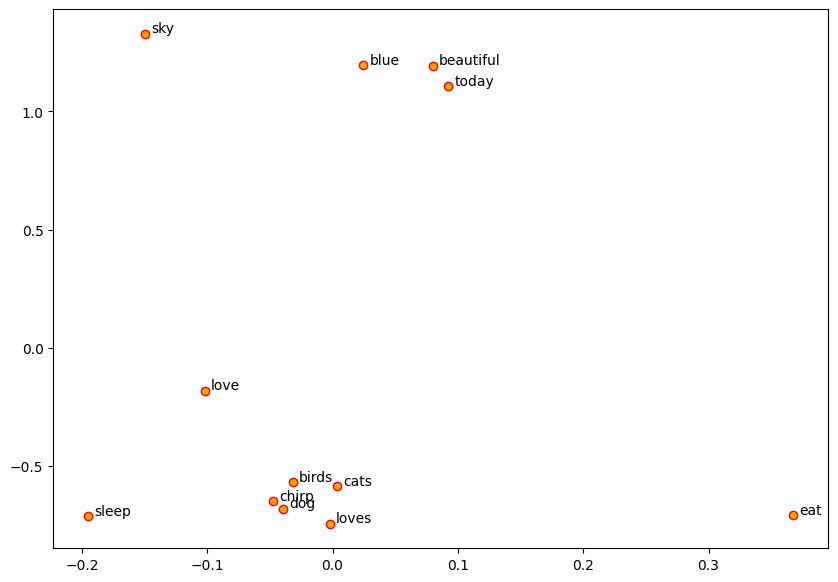

In [13]:
words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

pca = PCA(n_components=2, random_state=42)
np.set_printoptions(suppress=True)
pcs = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(10, 7))
plt.scatter(pcs[:, 1], pcs[:, 0], c='orange', edgecolors='r')
for label, x, y in zip(labels, pcs[:, 1], pcs[:, 0]):
    plt.annotate(label, xy=(x+0.005, y+0.005), xytext=(0, 0), textcoords='offset points')

In [14]:
w2v_model.wv['sky'], w2v_model.wv['sky'].shape

(array([-0.5729603 ,  0.39481637,  0.24301627,  0.47278437, -0.2360732 ,
        -0.343259  ,  0.5858813 ,  0.8051598 , -0.43501168,  0.19471067,
         0.23335059, -0.38316745, -0.1280008 ,  0.45462367,  0.28617364,
        -0.02496031,  0.34260848, -0.0952384 , -0.57644325, -0.47866657],
       dtype=float32),
 (20,))

In [15]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sky,-0.572960,0.394816,0.243016,0.472784,-0.236073,-0.343259,0.585881,0.805160,-0.435012,0.194711,0.233351,-0.383167,-0.128001,0.454624,0.286174,-0.024960,0.342608,-0.095238,-0.576443,-0.478667
sleep,-0.176839,0.249425,-0.150669,-0.503006,0.440308,0.026407,-0.076088,0.689986,-0.464908,0.421181,-0.119293,-0.136887,0.249013,-0.507815,0.272834,-0.136414,0.858378,-0.132124,-0.318168,0.053513
eat,-0.438586,0.256686,-0.337762,-0.532316,0.347023,0.020211,-0.196837,0.709618,-0.248538,0.553217,-0.174509,-0.050230,0.023182,-0.354986,0.391315,-0.174175,0.750836,-0.158834,-0.362234,0.283102
love,-0.321333,0.203535,-0.127205,-0.314640,0.199509,-0.013895,0.082840,0.589119,-0.345966,0.346168,0.071146,-0.089961,0.042177,-0.258603,0.268860,-0.080239,0.589464,-0.061239,-0.317720,-0.133810
beautiful,-0.580819,0.427266,0.246308,0.439892,-0.188785,-0.233421,0.564070,0.628990,-0.390579,0.324556,0.147487,-0.360440,-0.025368,0.388440,0.447800,0.029523,0.183217,-0.193335,-0.455220,-0.285104
blue,-0.623390,0.392800,0.210464,0.413985,-0.064962,-0.295899,0.501309,0.673356,-0.311430,0.147247,0.125281,-0.438494,-0.141453,0.479240,0.330017,0.063436,0.303666,-0.029319,-0.442899,-0.348309
loves,-0.291553,0.135733,-0.110787,-0.612068,0.405966,0.076799,-0.107905,0.654813,-0.352558,0.540885,0.113621,-0.176663,0.079206,-0.449278,0.340959,-0.072119,0.801564,-0.000193,-0.204701,0.235950
dog,-0.213969,0.117130,-0.326036,-0.531237,0.330371,0.134065,-0.004897,0.612319,-0.327878,0.479227,0.057243,-0.241062,0.107545,-0.370960,0.273376,-0.026024,0.874808,0.003190,-0.330190,0.211079
today,-0.592773,0.373147,0.146412,0.328049,-0.099601,-0.194966,0.526392,0.562759,-0.237284,0.241171,0.115884,-0.413918,-0.058201,0.446533,0.316147,-0.016950,0.195366,-0.096474,-0.361682,-0.345771
cats,-0.311770,0.175203,-0.164133,-0.504301,0.341800,0.038944,-0.069677,0.434802,-0.302098,0.371918,-0.016082,-0.124162,0.120012,-0.420236,0.222865,-0.089457,0.664828,-0.045488,-0.342365,0.152143


### Looking at term semantic similarity

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,sleep,eat,love,beautiful,blue,loves,dog,today,cats,chirp,birds
sky,1.000000,0.301787,0.285017,0.550839,0.971664,0.982269,0.257051,0.287594,0.971955,0.263997,0.301882,0.353002
sleep,0.301787,1.000000,0.935576,0.937687,0.304851,0.296355,0.956275,0.954524,0.282995,0.972126,0.982336,0.967581
eat,0.285017,0.935576,1.000000,0.907892,0.313001,0.303391,0.945430,0.941288,0.300744,0.959473,0.956467,0.954325
love,0.550839,0.937687,0.907892,1.000000,0.540442,0.537700,0.919168,0.923073,0.531321,0.930279,0.942794,0.960021
beautiful,0.971664,0.304851,0.313001,0.540442,1.000000,0.970774,0.272999,0.290135,0.981145,0.276395,0.312098,0.354035
blue,0.982269,0.296355,0.303391,0.537700,0.970774,1.000000,0.268799,0.295068,0.986594,0.272938,0.304726,0.357823
loves,0.257051,0.956275,0.945430,0.919168,0.272999,0.268799,1.000000,0.975434,0.258262,0.975388,0.958620,0.973810
dog,0.287594,0.954524,0.941288,0.923073,0.290135,0.295068,0.975434,1.000000,0.285789,0.971902,0.963640,0.969604
today,0.971955,0.282995,0.300744,0.531321,0.981145,0.986594,0.258262,0.285789,1.000000,0.264069,0.299221,0.350708
cats,0.263997,0.972126,0.959473,0.930279,0.276395,0.272938,0.975388,0.971902,0.264069,1.000000,0.982389,0.985135


In [17]:
w2v_model.wv.most_similar('sky')

[('blue', 0.9822693467140198),
 ('today', 0.9719552993774414),
 ('beautiful', 0.9716638922691345),
 ('love', 0.5508386492729187),
 ('birds', 0.35300227999687195),
 ('chirp', 0.3018820583820343),
 ('sleep', 0.3017871677875519),
 ('dog', 0.2875940501689911),
 ('eat', 0.2850167453289032),
 ('cats', 0.263996958732605)]

In [18]:
w2v_model.wv.most_similar('dog')

[('loves', 0.9754335284233093),
 ('cats', 0.9719014167785645),
 ('birds', 0.9696038365364075),
 ('chirp', 0.9636399149894714),
 ('sleep', 0.9545242190361023),
 ('eat', 0.9412879347801208),
 ('love', 0.9230731725692749),
 ('blue', 0.29506832361221313),
 ('beautiful', 0.2901352643966675),
 ('sky', 0.2875940799713135)]